## Problem 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import linalg

Part a: Create adjacency matrix for the given graph

In [2]:
#    x1 x2 x3 x4 x5 x6 x7 x8 x9 x10 x11 
# x1  0  1  0  1  0  0  0  1  1   0   0  
# x2  1  0  0  0  0  1  0  1  0   0   0
# x3  0  0  0  1  0  1  0  0  0   0   0
# x4  1  0  1  0  1  0  0  0  0   0   0
# x5  0  0  0  1  0  1  0  0  1   1   0
# x6  0  1  1  0  1  0  1  0  1   0   0
# x7  0  0  0  0  0  1  0  0  0   1   0
# x8  1  1  0  0  0  0  0  0  1   0   1
# x9  1  0  0  0  1  1  0  1  0   1   0
# x10 0  0  0  0  1  0  1  0  1   0   1
# x11 0  0  0  0  0  0  0  1  0   1   0

# Putting it into a np array form, it is as follows:
adjMat = np.array([[0,1,0,1,0,0,0,1,1,0,0],[1,0,0,0,0,1,0,1,0,0,0],[0,0,0,1,0,1,0,0,0,0,0],
                   [1,0,1,0,1,0,0,0,0,0,0],[0,0,0,1,0,1,0,0,1,1,0],[0,1,1,0,1,0,1,0,1,0,0],
                   [0,0,0,0,0,1,0,0,0,1,0],[1,1,0,0,0,0,0,0,1,0,1],[1,0,0,0,1,1,0,1,0,1,0],
                   [0,0,0,0,1,0,1,0,1,0,1],[0,0,0,0,0,0,0,1,0,1,0]])
adjMat

array([[0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]])

Part b: Count number of closed triangles. 

First, note that, two vertices i,j are connected if there is a 1 in the i,jth entry of the adjacency matrix. Similarly, the number of distinct length two paths from i to j is the i,jth entry of the square of the adjacency matrix, and the number of distinct length three paths from i to j is the i,jth entry of the cube of the adjacency matrix. We want closed triangles, which are length 3 and start and end at the same vertex. Thus, we need to look at the trace of the cubed adjacency matrix to get the number of length three paths from a vertex to itself. However, the trace will overcount the number of triangles by a factor of 6 because each triangle has three vertices and starting from a given vertex, one can go to one of two other vertices. Thus, the number of triangles in the graph is A^3/6, where A is the adjacency matrix.

In [3]:
# Compute cube of adjacency matrix.
adjCubed = np.matmul(np.matmul(adjMat,adjMat),adjMat)
# Calculate number of triangles with formula.
numTri = np.trace(adjCubed) / 6
print("Number of closed triangles is", int(numTri))

Number of closed triangles is 4


Part c: Calculate the Laplacian matrix for the graph, eigenvalues and eigenvectors.

I looked up the Laplacian matrix, and I found that the Laplacian is just the degree matrix minus the adjacency matrix. The degree matrix is as follows:

In [4]:
degMat = np.array([[4,0,0,0,0,0,0,0,0,0,0],[0,3,0,0,0,0,0,0,0,0,0],[0,0,2,0,0,0,0,0,0,0,0],
                   [0,0,0,3,0,0,0,0,0,0,0],[0,0,0,0,5,0,0,0,0,0,0],[0,0,0,0,0,5,0,0,0,0,0],
                   [0,0,0,0,0,0,2,0,0,0,0],[0,0,0,0,0,0,0,4,0,0,0],[0,0,0,0,0,0,0,0,5,0,0],
                   [0,0,0,0,0,0,0,0,0,4,0],[0,0,0,0,0,0,0,0,0,0,2]])
degMat

array([[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]])

In [5]:
# Calculate Laplacian using L = D - A
lapMat = degMat - adjMat
lapMat

array([[ 4, -1,  0, -1,  0,  0,  0, -1, -1,  0,  0],
       [-1,  3,  0,  0,  0, -1,  0, -1,  0,  0,  0],
       [ 0,  0,  2, -1,  0, -1,  0,  0,  0,  0,  0],
       [-1,  0, -1,  3, -1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, -1,  5, -1,  0,  0, -1, -1,  0],
       [ 0, -1, -1,  0, -1,  5, -1,  0, -1,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  2,  0,  0, -1,  0],
       [-1, -1,  0,  0,  0,  0,  0,  4, -1,  0, -1],
       [-1,  0,  0,  0, -1, -1,  0, -1,  5, -1,  0],
       [ 0,  0,  0,  0, -1,  0, -1,  0, -1,  4, -1],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  2]])

In [6]:
# Use linalg library to calculate eigenvalues, eigenvectors.
evals,evects = np.linalg.eig(lapMat)
print("The eigenvalues of the Laplacian are:")
for i in range (0,len(evals)):
    print(evals[i])

The eigenvalues of the Laplacian are:
7.12246764872
6.58738415088
0.0728041804503
5.36500658164
4.90925723108
4.13103440988
3.45298610526
2.76907346699
1.95063611102
1.1729950366
1.46635507749


According to the numpy linalg documentation, the eigenvectors are the columns of the array that I have named 'evects.'

In [7]:
print("The eigenvectors of the Laplacian are:")
for i in range (0,len(evects)):
    print(evects[:,i])

The eigenvectors of the Laplacian are:
[ 0.15584518 -0.24125161 -0.12804646  0.04648993 -0.21945196  0.60942389
 -0.18358974  0.22928288 -0.52114273  0.3310086  -0.10937921]
[ -2.95637471e-01   5.62555122e-02  -1.09780868e-01   3.07369403e-01
  -6.97233787e-01   1.96237609e-01  -6.44583902e-02  -1.02410271e-01
   5.03713062e-01   9.94577885e-02   6.43609224e-04]
[ 0.31198824  0.31691412  0.30751022  0.29392962  0.24089108  0.2987028
  0.30903524  0.31697865  0.29741651  0.29686862  0.31851837]
[-0.58120778  0.09941941  0.02723617  0.19675604  0.08864229 -0.28840591
  0.02728135  0.63448615 -0.13730915  0.196604   -0.24698025]
[ 0.26715545  0.22256912  0.19513338 -0.10650812 -0.25893744 -0.46118508
 -0.07255232 -0.23091208 -0.12806195  0.67225845 -0.15170414]
[ 0.34865847 -0.55089093  0.20962288 -0.26473154 -0.25886086 -0.18198202
  0.12845673  0.45640015  0.31353607 -0.09176368 -0.17110773]
[ 0.24887845  0.01513982 -0.13520824  0.49559154 -0.33816629 -0.29913586
  0.41345806  0.0433992

Part d: use eigenvectors corresponding to lowest eigenvalues to plot graph.

Smallest eigenvalues are 0.07280418 and 1.17299504, corresponding to indices 2 and 9. But after graphing, I didn't get results I expected, so I concluded that the 0.0728.. was essentially the zero eigenvalue. Thus, the smallest non-zero eigenvalues are 1.17299504 and 1.46635507749, corresponding to indices 9 and 10.

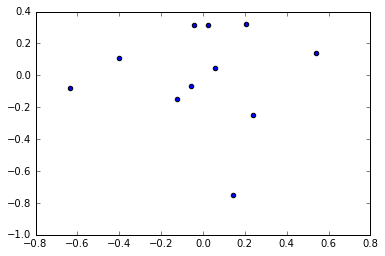

In [8]:
# Scatterplot for graph
x=evects[:,9]
y=evects[:,10]
plt.scatter(x,y)
plt.show()

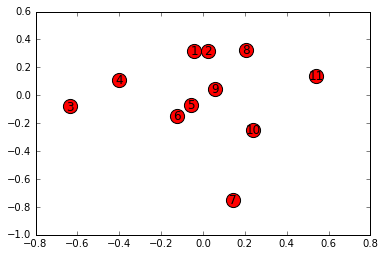

In [9]:
import networkx as nx

# Initialize the eigenvectors.
vec1=evects[:,9]
vec2=evects[:,10]

# Initialize and empty graph
G=nx.Graph()
# Add nodes with corresponding positions.
G.add_node(1,pos=(vec1[0],vec2[0]))
G.add_node(2,pos=(vec1[1],vec2[1]))
G.add_node(3,pos=(vec1[2],vec2[2]))
G.add_node(4,pos=(vec1[3],vec2[3]))
G.add_node(5,pos=(vec1[4],vec2[4]))
G.add_node(6,pos=(vec1[5],vec2[5]))
G.add_node(7,pos=(vec1[6],vec2[6]))
G.add_node(8,pos=(vec1[7],vec2[7]))
G.add_node(9,pos=(vec1[8],vec2[8]))
G.add_node(10,pos=(vec1[9],vec2[9]))
G.add_node(11,pos=(vec1[10],vec2[10]))

pos=nx.get_node_attributes(G,'pos')
nx.draw_networkx(G, pos=pos, node_size=200)
# 1 corresponds to x1, 2 to x2, etc.

As expected, x5,x6,x9, which all had degree 5, are at the center. Meanwhile, x3,x7,x11, which each only had 2 connections, are out toward the fringes of the graph. To visualize this better, I added the edges to the graph below.

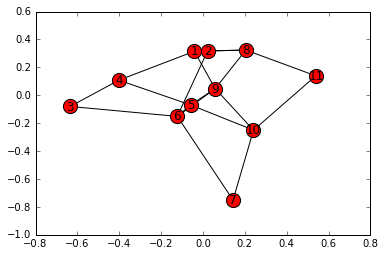

In [10]:
# Add edges.
for i in range(0,11):
    for j in range(0,11):
        if adjMat[i][j]==1:
            G.add_edge(i+1,j+1)
nx.draw_networkx(G, pos=pos, node_size=200)

Again, the vertices with few connections are relatively isolated, while those with more connections are closer to the center and other vertices.